# Time Series Analysis on Apple Stocks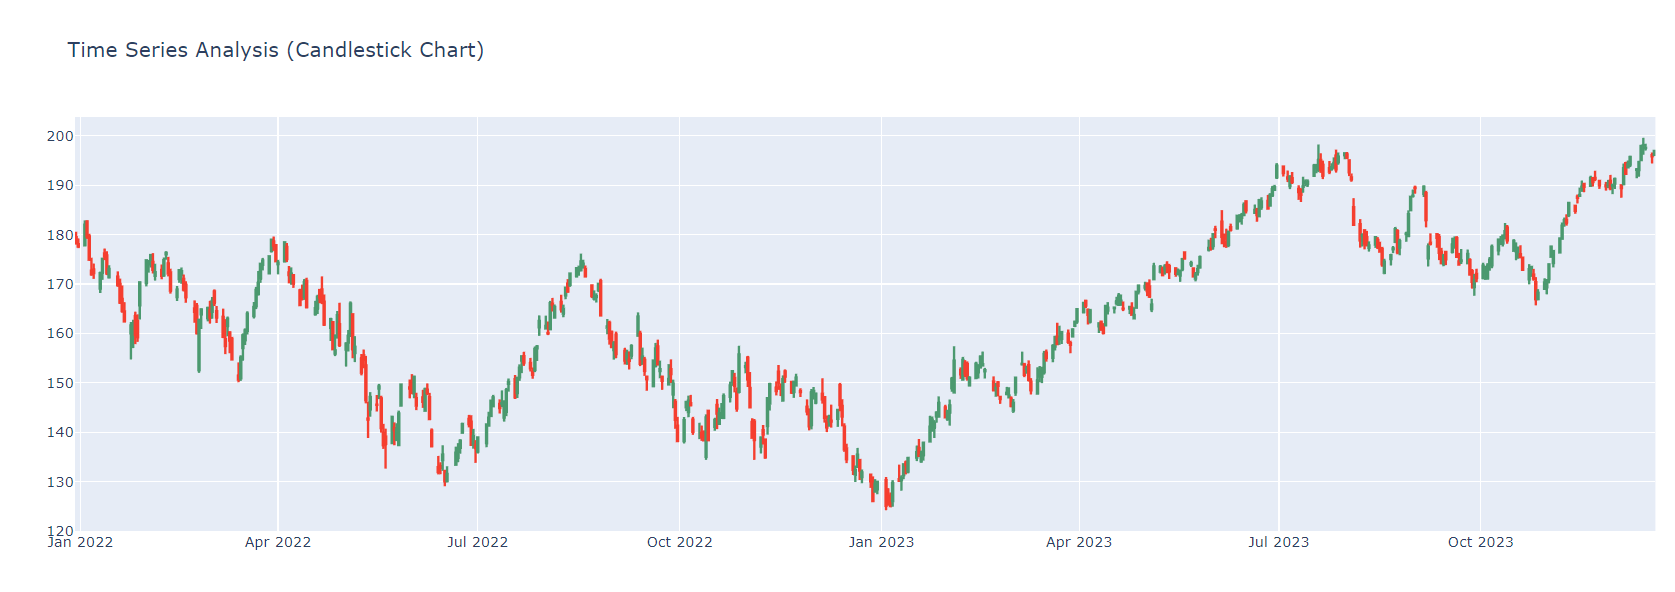

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.186951   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.564072   
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953903   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   

               Volume  
Date                   
2021-12-30   59773000  
2021-12-31   64062300  
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  


In [2]:
import plotly.express as px
figure = px.line(data, x = data.index,
                 y = "Close",
                 title = "Time Series Analysis (Line Plot)")
figure.show()

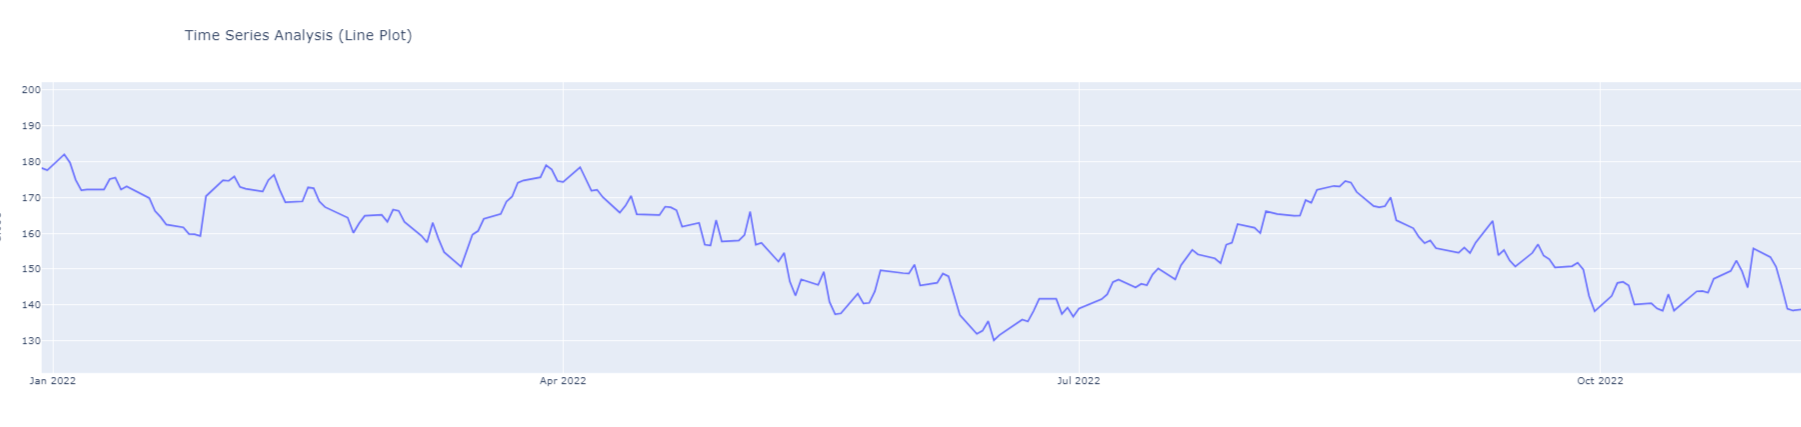

## CandleStick chart for AAPL stock

In [3]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = data.index,
                                        open = data["Open"],
                                        high = data["High"],
                                        low = data["Low"],
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart)",
                     xaxis_rangeslider_visible = False)
figure.show()

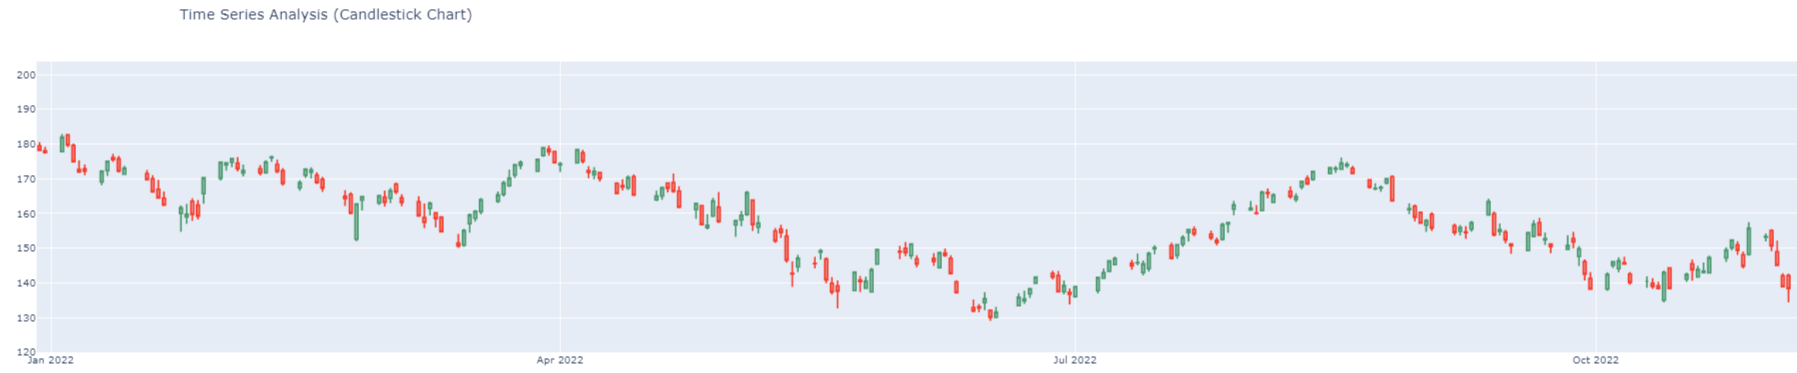

In [4]:
figure = px.bar(data, x = data.index,
                y = "Close",
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

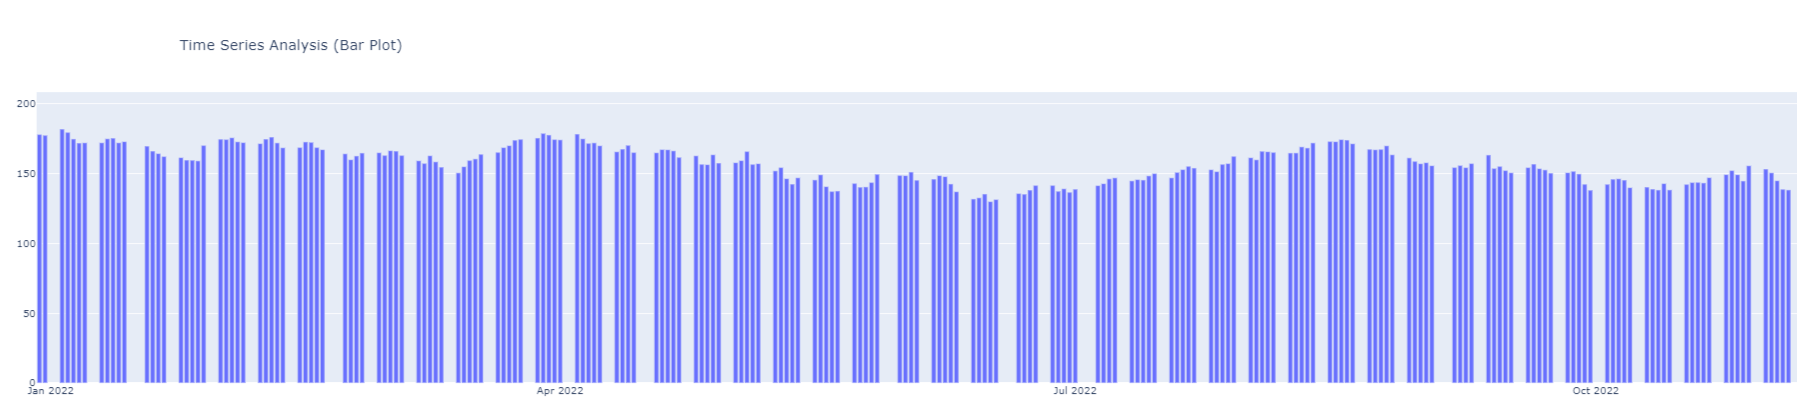

In [5]:
figure = px.line(data, x = data.index,
                 y = 'Close',
                 range_x = ['2021-07-01','2021-12-31'],
                 title = "Time Series Analysis (Custom Date Range)")
figure.show()

In [6]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"],
                                        high = data["High"],
                                        low = data["Low"],
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

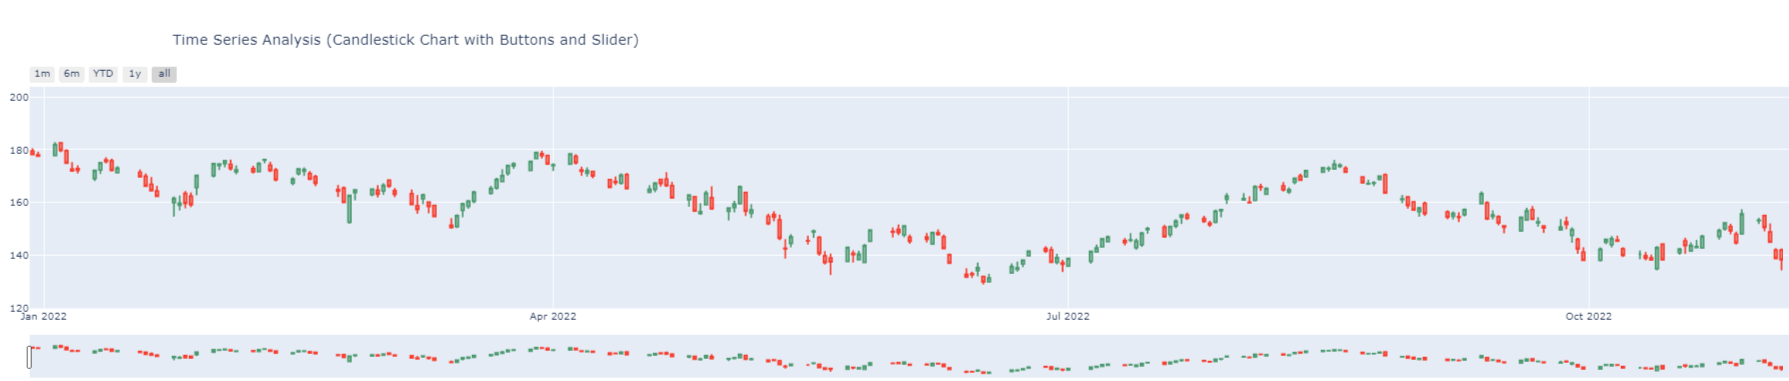